# Excelデータから作図

九州各県の人口推移をまとめたexcelから、作図

In [1]:
import pandas
import matplotlib.pyplot as plt

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


各県の人口推移をプロットする関数

In [2]:
def drawTimeSequence(df):#dataFrameを受け取る
    for pref in df.index:#各行にある県名を取得
        ser = df.loc[pref]#一行のデータ（時系列）を取得
        #一行のデータをプロットし、ラベルとして県名を設定
        ser.plot(label=pref)

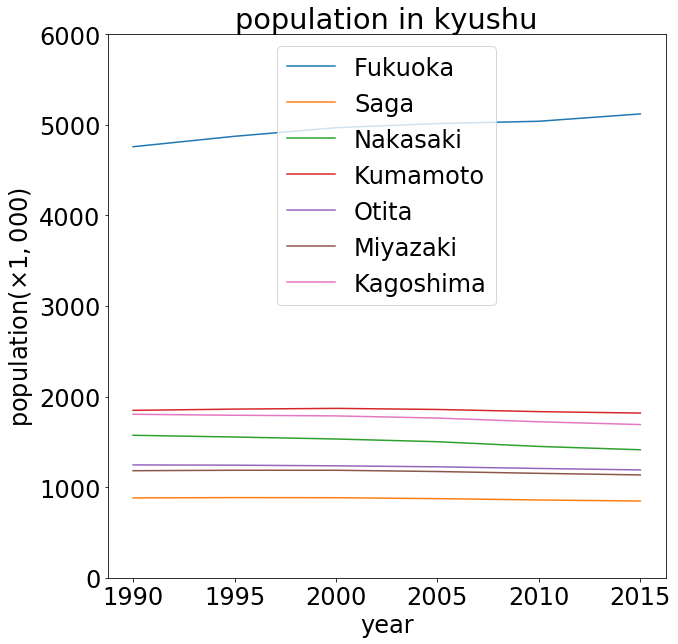

In [3]:
filename = 'KyushuPopulation.xlsx'
with pandas.ExcelFile(filename) as f:
    df = pandas.read_excel(f)
df.set_index('Prefecture',inplace=True)#左端のカラムにインデクスを設定
   
#図の準備
plt.figure(figsize=(10,10))
plt.rcParams['font.size']=24
plt.title('population in kyushu')
plt.ylim(0,6000)
plt.xlabel('year')
plt.ylabel('population($\\times1,000$)')
#各県のデータをプロット
drawTimeSequence(df)

plt.legend()
plt.show()